# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fraud = pd.read_csv('free_frauds.csv')

In [4]:
fraud = fraud.sample(n=100000)

In [5]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,244.146510,1.801383e+05,8.234140e+05,8.444641e+05,1.093171e+06,1.216618e+06,0.001240,0.0
std,142.737472,5.741575e+05,2.864524e+06,2.900467e+06,3.644406e+06,3.890967e+06,0.035192,0.0
min,1.000000,3.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.341820e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,249.000000,7.509418e+04,1.434289e+04,0.000000e+00,1.335599e+05,2.130425e+05,0.000000,0.0
75%,335.000000,2.080984e+05,1.071658e+05,1.427190e+05,9.323358e+05,1.108578e+06,0.000000,0.0
max,734.000000,4.363841e+07,3.408192e+07,3.426623e+07,3.281945e+08,3.279981e+08,1.000000,0.0


In [7]:
fraud['isFraud'].value_counts()

0    99876
1      124
Name: isFraud, dtype: int64

In [8]:
fraud['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

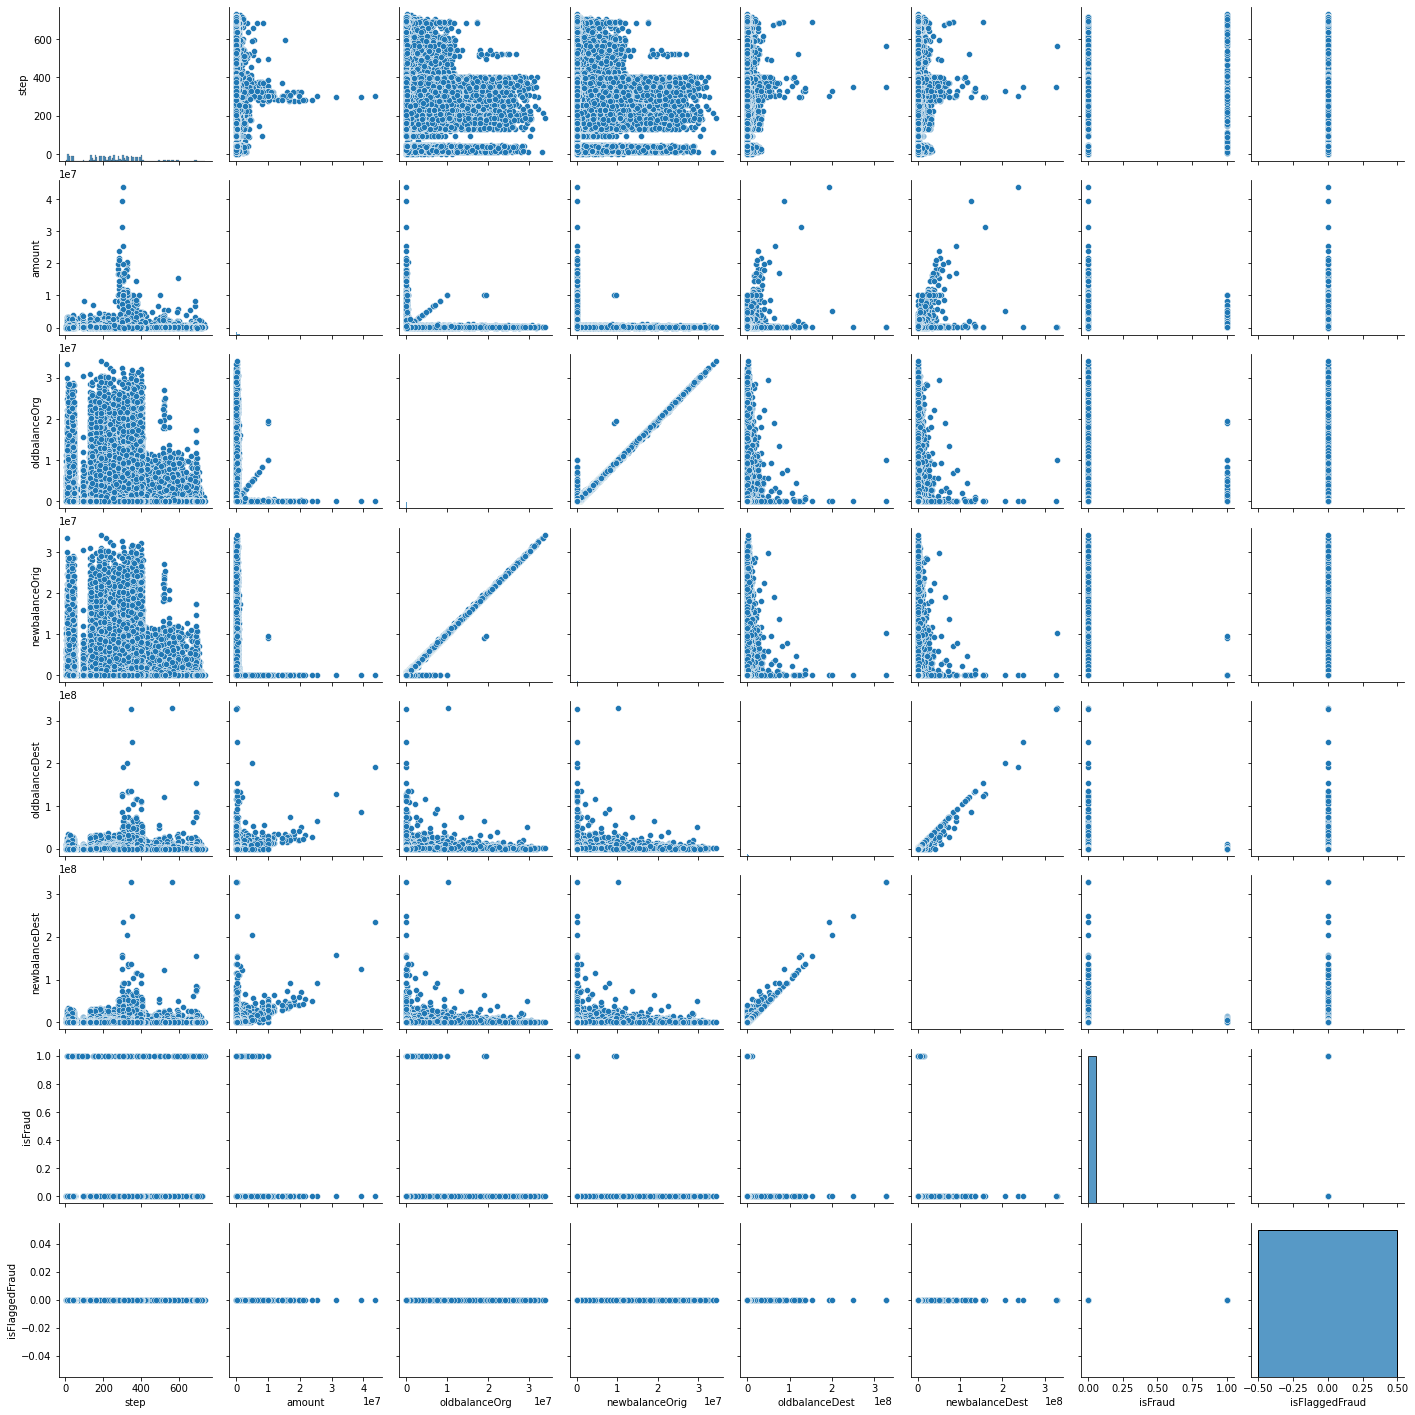

In [9]:
sns.pairplot(fraud)

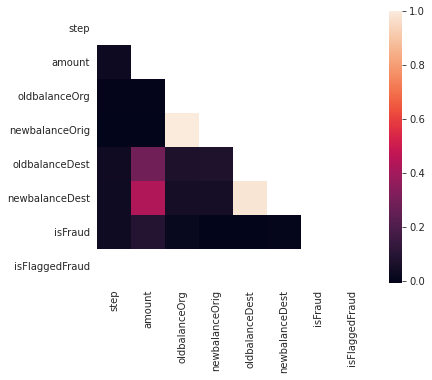

In [10]:
corr = fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

In [ ]:
# to determine the outcome we need : oldbalanceDest, newbalanceDest and amount.

### What is the distribution of the outcome? 

<AxesSubplot:>

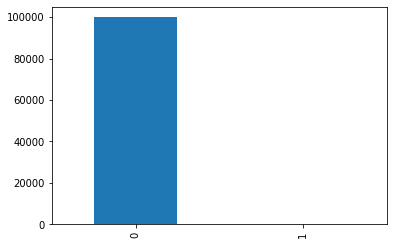

In [11]:
# Your response here

count_classes = pd.value_counts(fraud['isFraud'])
count_classes.plot(kind = 'bar')

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [12]:
# Your code here

fraud['step'].value_counts()

19     825
18     801
163    773
187    746
43     736
      ... 
734      1
219      1
724      1
151      1
541      1
Name: step, Length: 464, dtype: int64

In [ ]:
# I most likely need to modify step into days of the week.

In [13]:
days = range(1,31)
fraud['days'] = pd.cut(fraud['step'], 30, labels=days)

In [14]:
fraud[(fraud['step'] > 250 ) & (fraud['step'] < 350)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days
4408014,322,CASH_OUT,111534.21,C674790250,60601.00,0.00,C77370671,0.00,111534.21,0,0,14
3459687,257,PAYMENT,8546.09,C1333770307,0.00,0.00,M1246337550,0.00,0.00,0,0,11
3430532,256,PAYMENT,15684.23,C160608995,474238.00,458553.77,M1166774463,0.00,0.00,0,0,11
3880967,283,CASH_OUT,219160.81,C1544253120,0.00,0.00,C146404126,1281672.56,1500833.37,0,0,12
3556564,260,CASH_IN,41369.19,C33196158,3047232.29,3088601.48,C241235296,871658.68,830289.49,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4255400,306,CASH_OUT,140354.55,C2025069539,0.00,0.00,C319947528,1023251.42,1163605.97,0,0,13
4912189,349,PAYMENT,12177.04,C1494761463,11271.00,0.00,M1090072276,0.00,0.00,0,0,15
4907123,349,PAYMENT,541.19,C54377164,0.00,0.00,M955115979,0.00,0.00,0,0,15
4705567,331,PAYMENT,13455.48,C1966989812,24309.00,10853.52,M1740827390,0.00,0.00,0,0,14


In [15]:
def hour(row):
    number = row%24
    if number in list(range(0,13)):
        return 'Morning'
    elif number in list(range(13,19)):
        return 'Afternoon'
    else:
        return 'Night'

In [16]:
fraud['hour'] = fraud['step'].apply(hour)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,hour
2039337,180,CASH_OUT,272493.54,C1795608947,1074.00,0.00,C1144129347,3126904.22,3399397.76,0,0,8,Morning
385100,17,CASH_IN,93819.94,C1736714832,5526115.58,5619935.52,C1703466391,109103.94,15284.00,0,0,1,Afternoon
5251897,371,PAYMENT,14405.16,C8291046,0.00,0.00,M406221172,0.00,0.00,0,0,16,Morning
797930,40,CASH_OUT,81805.05,C1611145643,0.00,0.00,C351145264,421935.00,34792.15,0,0,2,Afternoon
4408014,322,CASH_OUT,111534.21,C674790250,60601.00,0.00,C77370671,0.00,111534.21,0,0,14,Morning


In [17]:
fraud['days'].describe()

count     100000
unique        30
top            1
freq        8908
Name: days, dtype: int64

In [18]:
def week_days(row):
    number = row%7
    if number == 1:
        return 'Monday'
    elif number == 2:
        return 'Tuesday'
    elif number == 3:
        return 'Wednesday'
    elif number == 4:
        return 'Thursday'
    elif number == 5:
        return 'Friday'
    elif number == 6:
        return 'Saturday'
    else:
        return 'Sunday'

In [19]:
fraud['week_days'] = fraud['days'].apply(week_days)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,hour,week_days
2039337,180,CASH_OUT,272493.54,C1795608947,1074.00,0.00,C1144129347,3126904.22,3399397.76,0,0,8,Morning,Monday
385100,17,CASH_IN,93819.94,C1736714832,5526115.58,5619935.52,C1703466391,109103.94,15284.00,0,0,1,Afternoon,Monday
5251897,371,PAYMENT,14405.16,C8291046,0.00,0.00,M406221172,0.00,0.00,0,0,16,Morning,Tuesday
797930,40,CASH_OUT,81805.05,C1611145643,0.00,0.00,C351145264,421935.00,34792.15,0,0,2,Afternoon,Tuesday
4408014,322,CASH_OUT,111534.21,C674790250,60601.00,0.00,C77370671,0.00,111534.21,0,0,14,Morning,Sunday


In [20]:
clean_fraud = fraud.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud','days'])
clean_fraud.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,week_days
2039337,CASH_OUT,272493.54,1074.00,0.00,3126904.22,3399397.76,0,Morning,Monday
385100,CASH_IN,93819.94,5526115.58,5619935.52,109103.94,15284.00,0,Afternoon,Monday
5251897,PAYMENT,14405.16,0.00,0.00,0.00,0.00,0,Morning,Tuesday
797930,CASH_OUT,81805.05,0.00,0.00,421935.00,34792.15,0,Afternoon,Tuesday
4408014,CASH_OUT,111534.21,60601.00,0.00,0.00,111534.21,0,Morning,Sunday


In [21]:
fraud_dummy = pd.get_dummies(clean_fraud, columns=['type','week_days','hour'])
fraud_dummy.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,week_days_Friday,week_days_Monday,week_days_Saturday,week_days_Sunday,week_days_Thursday,week_days_Tuesday,week_days_Wednesday,hour_Afternoon,hour_Morning,hour_Night
2039337,272493.54,1074.00,0.00,3126904.22,3399397.76,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
385100,93819.94,5526115.58,5619935.52,109103.94,15284.00,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5251897,14405.16,0.00,0.00,0.00,0.00,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
797930,81805.05,0.00,0.00,421935.00,34792.15,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4408014,111534.21,60601.00,0.00,0.00,111534.21,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(fraud_dummy).transform(fraud_dummy)

norm = pd.DataFrame(norm, columns = fraud_dummy.columns)

norm.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,week_days_Friday,week_days_Monday,week_days_Saturday,week_days_Sunday,week_days_Thursday,week_days_Tuesday,week_days_Wednesday,hour_Afternoon,hour_Morning,hour_Night
0,0.006244,0.000032,0.000000,0.009528,0.010364,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.002150,0.162142,0.164008,0.000332,0.000047,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000330,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.001875,0.000000,0.000000,0.001286,0.000106,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.002556,0.001778,0.000000,0.000000,0.000340,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Run a logisitc regression classifier and evaluate its accuracy.

In [23]:
# Your code here


from sklearn.model_selection import train_test_split

X = norm.drop(columns='isFraud')

y = norm['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, test_size = 0.25)

In [24]:
from sklearn.utils import resample

train = pd.concat([X_train, y_train],axis=1)
train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,...,week_days_Monday,week_days_Saturday,week_days_Sunday,week_days_Thursday,week_days_Tuesday,week_days_Wednesday,hour_Afternoon,hour_Morning,hour_Night,isFraud
2606,0.005174,0.000000,0.0,0.000908,0.001597,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
57228,0.003051,0.000590,0.0,0.000000,0.000406,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8382,0.000761,0.000490,0.0,0.005810,0.005915,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60281,0.000429,0.000508,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48432,0.000016,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
no_fraud = train[train['isFraud']==0]
yes_fraud = train[train['isFraud']==1]

In [26]:
yes_fraud_oversampled = resample(yes_fraud, 
                                    replace=True,
                                    n_samples = len(no_fraud),
                                    random_state=0)


In [27]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False,
                                    n_samples = len(yes_fraud),
                                    random_state=0)

In [28]:
display(no_fraud.shape)
display(yes_fraud_oversampled.shape)

(74905, 21)

(74905, 21)

In [29]:
display(yes_fraud.shape)
display(no_fraud_undersampled.shape)


(95, 21)

(95, 21)

In [30]:
train_oversampled = pd.concat([no_fraud,yes_fraud_oversampled])
train_oversampled.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,...,week_days_Monday,week_days_Saturday,week_days_Sunday,week_days_Thursday,week_days_Tuesday,week_days_Wednesday,hour_Afternoon,hour_Morning,hour_Night,isFraud
2606,0.005174,0.000000,0.0,0.000908,0.001597,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
57228,0.003051,0.000590,0.0,0.000000,0.000406,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8382,0.000761,0.000490,0.0,0.005810,0.005915,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60281,0.000429,0.000508,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48432,0.000016,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
train_undersampled = pd.concat([yes_fraud,no_fraud_undersampled])
train_undersampled.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,...,week_days_Monday,week_days_Saturday,week_days_Sunday,week_days_Thursday,week_days_Tuesday,week_days_Wednesday,hour_Afternoon,hour_Morning,hour_Night,isFraud
54774,0.032578,0.041713,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1106,0.002681,0.003432,0.0,0.000871,0.001229,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
47991,0.007602,0.009733,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25575,0.007996,0.010239,0.0,0.000620,0.001684,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
87631,0.029823,0.038185,0.0,0.000936,0.004904,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [32]:
y_train_over = train_oversampled['isFraud'].copy()
X_train_over = train_oversampled.drop('isFraud',axis = 1).copy()

In [33]:
y_train_under = train_undersampled['isFraud'].copy()
X_train_under = train_undersampled.drop('isFraud',axis = 1).copy()

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

fraud_model = model.fit(X_train_over, y_train_over)

/home/jorgebra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = fraud_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[21198  3773]
 [    4    25]]
0.84892


In [36]:
print("test data accuracy was ",fraud_model.score(X_test,y_test))

print("train data accuracy was ", fraud_model.score(X_train, y_train))

test data accuracy was  0.84892
train data accuracy was  0.8482533333333333


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

pred = fraud_model.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.006582411795681938
recall:  0.8620689655172413
f1:  0.013065064018813691


In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =1,sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_sample(X_train,y_train)

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print(confusion_matrix(y_test,pred))
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

[[22004  2967]
 [    4    25]]
precision:  0.008355614973262033
recall:  0.8620689655172413
f1:  0.0165508109897385


### Now pick a model of your choice and evaluate its accuracy.

In [40]:
# Your code here

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train_SMOTE, y_train_SMOTE)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.97728
train data accuracy was  0.9772133333333334


In [41]:
pred = model.predict(X_test)

print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))


print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

[[24406   565]
 [    3    26]]
0.97728
precision:  0.043993231810490696
recall:  0.896551724137931
f1:  0.08387096774193549


### Which model worked better and how do you know?

In [2]:
# Your response here

# I think DecisionTreeRegressor was the one that gave the best result.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.